# Roderick Powell 

Emory University - Applied DS & ML with Python Program

# Supervised Machine Learning with Sklearn - Capstone Project

## (Classification Problem: Subscribe to Term Deposit or Not)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib.font_manager
from scipy import stats
from pylab import savefig
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## 1. Data Collection

In [2]:
bcustomer = pd.read_csv('bank-additional-full.csv')

In [3]:
bcustomer.keys() # Take a look at the keys

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')

**Convert the data into a dataframe, and assign columns**

In [4]:
bcustomer_df = pd.DataFrame(bcustomer)
bcustomer_df.head(3)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."


In [5]:
bcustomer_df.shape #To see how many records and features.

(41188, 1)

**The original data set had all of the fields in one column.  Need to re-import data breaking out fields into separate columns.**

In [6]:
bcustomer = pd.read_csv('bank-additional-full.csv',sep=';',header=0)

In [7]:
bcustomer_df = pd.DataFrame(bcustomer)
bcustomer_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# rename y to subscribe
bcustomer_df.rename(columns={"y":"subscribe"}, inplace=True)
bcustomer_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
bcustomer_df.shape #To see how many records and features.

(41188, 21)

In [10]:
bcustomer_df.columns #To see names of all of the features.

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

In [11]:
# To see number of unique values for each feature. Also indicates which features are continuous vs categorical

for x in ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe']:
    UniqueNumber=bcustomer_df[x].nunique()
    print(x,'=',UniqueNumber)


age = 78
job = 12
marital = 4
education = 8
default = 3
housing = 3
loan = 3
contact = 2
month = 10
day_of_week = 5
duration = 1544
campaign = 42
pdays = 27
previous = 8
poutcome = 3
emp.var.rate = 10
cons.price.idx = 26
cons.conf.idx = 26
euribor3m = 316
nr.employed = 11
subscribe = 2


In [12]:
bcustomer_df['marital'].unique() #This feature is clearly a categorical variable.

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

## 2. Data Exploration and Visualization

In [13]:
# Check the "subscribe" versus "no subscribe" responses. This is an imbalanced dataset. Many more "no" versus "yes" responses.
bcustomer_df['subscribe'].value_counts() 


no     36548
yes     4640
Name: subscribe, dtype: int64

In [14]:
# Determine proportion of success.  It is 11%.
proportion_response = bcustomer_df['subscribe'].value_counts('yes','no') 
print(proportion_response)

no     0.887346
yes    0.112654
Name: subscribe, dtype: float64


In [15]:
# Get some basic info on each variable
bcustomer_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribe         41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [16]:
# Check for missing values.
bcustomer_df.isnull().sum(0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [17]:
# Check for duplicates
DuplicateRows = bcustomer_df[bcustomer_df.duplicated()]
print(DuplicateRows)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [18]:
# Get descriptive statistics for continous variables
bcustomer_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
# Get descriptive statistics for categorical variables
cat_attributes = [col for col in bcustomer_df.columns if type(bcustomer_df['%s'%col][0])==str]
bcustomer_df[cat_attributes].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribe
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [20]:
# Returns counts of term deposit subscribers per educational group

pos_counts = bcustomer_df.loc[bcustomer_df.subscribe.values == 'yes', 'education'].value_counts() 
print(pos_counts)

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64


In [21]:
# Returns counts of term deposit subscribers per job type

pos_counts = bcustomer_df.loc[bcustomer_df.subscribe.values == 'yes', 'job'].value_counts() 
print(pos_counts)

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64


**Get a correlation Plot**

In [22]:
#corm = bcustomer_df.iloc[:,:-1].corr()
#masko = np.zeros_like(corm, dtype = np.bool)
#masko[np.triu_indices_from(masko)] = True

In [23]:
# Correlation matrix of continuous variables
# High correlation between emp.var.rate & nr.employed, emp. var.rate & euribor3m, and nr.employed & euribor3m

bcustomer_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


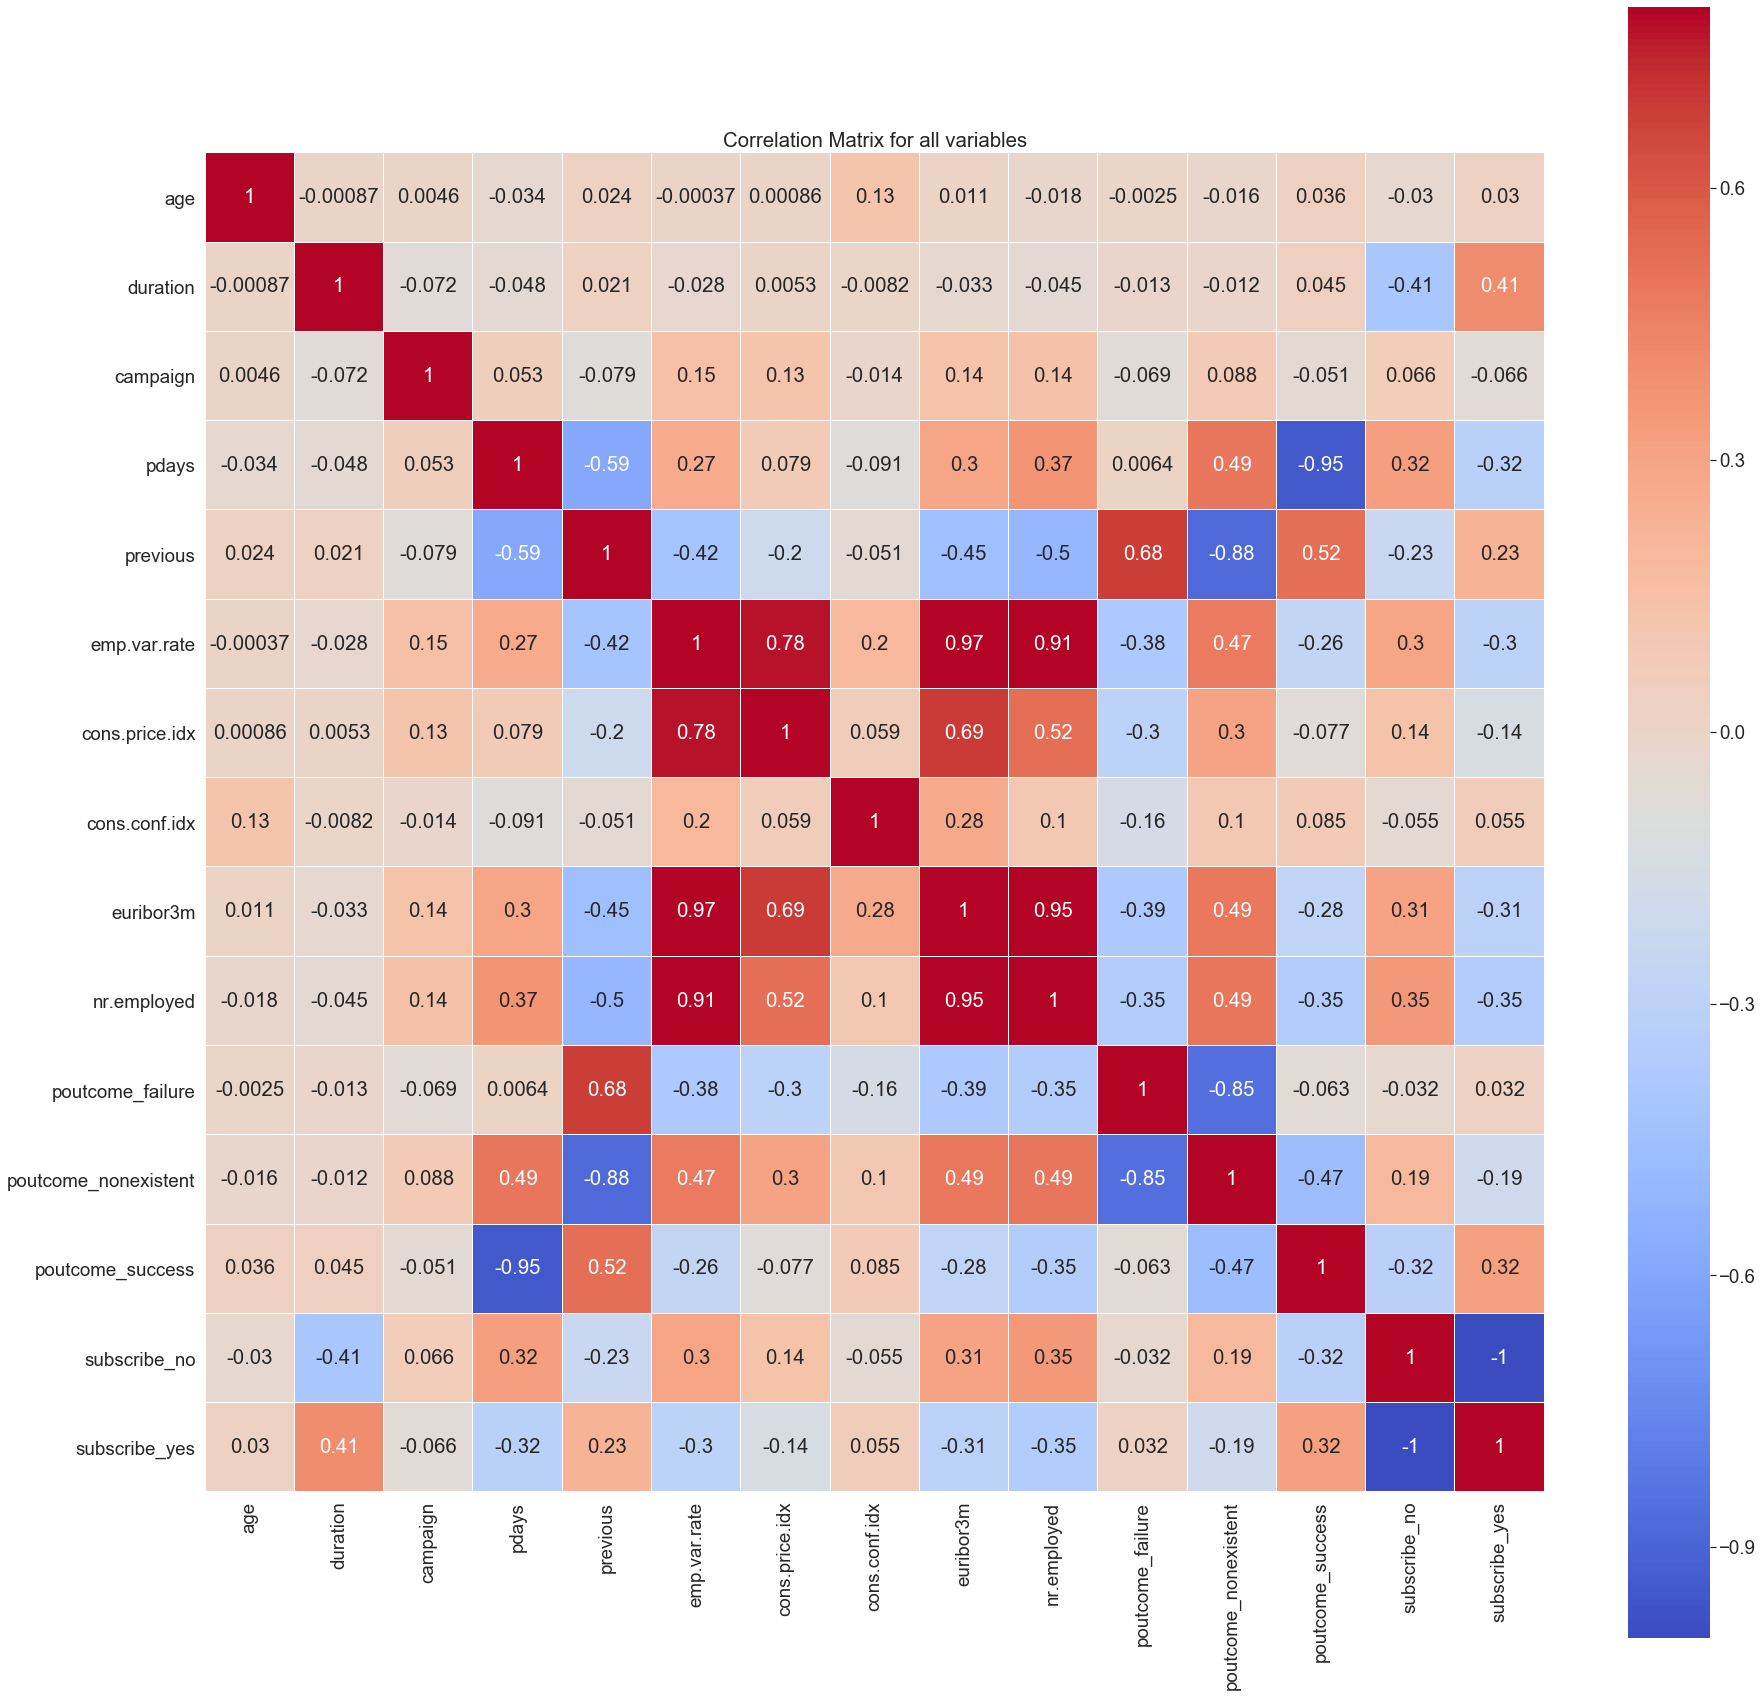

In [24]:
# Correlation matrix of all variables

# Create dummy variables for categorical variables
bcustomer_df_with_dummies = pd.get_dummies(bcustomer_df.drop([col for col in cat_attributes if col not in ['subscribe', 'poutcome']], axis=1))
corrMatrix = bcustomer_df_with_dummies.corr()

sns.set(font_scale=1.70)
plt.figure(figsize=(30, 30))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='coolwarm',linecolor="white")
plt.title('Correlation Matrix for all variables');

# Duration has the strongest relationship with target variable.


In [25]:
# Correlation between poutcome and subscribe.  Determine if previous success is related to future subscription.

PoutcomeSubscribe = pd.DataFrame(bcustomer_df_with_dummies,columns=['poutcome_success','subscribe_yes'])
PoutcomeSubscribe.corr()


,poutcome_success,subscribe_yes
poutcome_success,1.000000,0.316269
subscribe_yes,0.316269,1.000000


In [103]:
# Records that relate to subscribe; these could be considered outliers or anomalies
# This data could be analyzed using domain knowledge to help determine why these features relate to subscriptions

X_outliers = pd.get_dummies(bcustomer_df)
X_outliers = X_outliers[X_outliers.subscribe_yes != 0] # all records related to subscribe
X_outliers = X_outliers.loc[:,X_outliers.columns != 'subscribe_yes'] # drop column
X_outliers = X_outliers.loc[:,X_outliers.columns != 'subscribe_no'] # drop column
X_outliers.shape

(4640, 63)

## 3. Data Preparation

In [26]:
# If there are any data preperation steps, like removing columns, missing values, imputation etc.

In [27]:
bcustomer_df_with_dummies.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribe_no,subscribe_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0


In [28]:
bcustomer_df_with_dummies.shape

(41188, 15)

**Seperate independent variables into a X data frame, and target variable into y series.**

In [29]:
X = bcustomer_df.loc[:,bcustomer_df.columns != 'subscribe']
X = pd.get_dummies(X)
X.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
# Change string into numeric. 

y = bcustomer_df.loc[:,'subscribe']
y = pd.get_dummies(y, drop_first=True)
y.head()


,yes
0,0
1,0
2,0
3,0
4,0


In [31]:
y['yes'].unique() 

array([0, 1], dtype=uint64)

In [32]:
y.shape

(41188, 1)

## 4. Train/Test Split - Traditional Approach

In [33]:
# Technically, data should be split into three sections: Train, Validation and Test
# For simplicity, I am only using Train and Test splits for this project

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [36]:
print (X_train.shape)
print (X_test.shape)

(30891, 63)
(10297, 63)


In [37]:
print (y_train.shape)
print (y_test.shape)

(30891, 1)
(10297, 1)


## 5. Apply Machine Learning models for Classification

### 5.1 Logistic Regression

**Train a logistic regression model on the training data**

In [38]:
from sklearn import preprocessing
sca=preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predictions, Confusion matrix, & scores**

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)

print ('First 8 Predictions for training data are: ', ypred_train_logr[:8])
print ('First 8 Predictions for test data are: ', ypred_test_logr[:8])

First 8 Predictions for training data are:  [0 0 0 0 0 0 0 1]
First 8 Predictions for test data are:  [0 0 1 0 0 0 0 0]


In [41]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')

confusion matrix for training data is : 
 [[26718   727]
 [ 1952  1494]] 
 

confusion_matrix for test data is : 
 [[8850  253]
 [ 716  478]] 



**Accuracy, Recall & Precision**

**On Training Data**

In [42]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')

Accuracy for train data is : 
 0.9132757113722444 

Recall for train data is : 
 0.4335461404526988 

Precision for train data is : 
 0.6726699684826655 

f1-score for train data is : 
 0.5272631021704607 



**On Test Data**

In [43]:
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1-score for test data is : \n', f1_score(y_test,ypred_test_logr), '\n')

Accuracy for test data is : 
 0.9058949208507332 

Recall for test data is : 
 0.40033500837520936 

Precision for test data is : 
 0.6538987688098495 

f1-score for test data is : 
 0.4966233766233766 



### 5.1.b Predicting actual probabilities using .predict_proba method

In [44]:
yprob_test_logr = logr.predict_proba(X_test)
yprob_test_logr[0:9,:].round(3) # Probabilities that the target variable is 0, 1

array([[0.913, 0.087],
       [0.895, 0.105],
       [0.293, 0.707],
       [0.946, 0.054],
       [0.996, 0.004],
       [0.823, 0.177],
       [0.992, 0.008],
       [0.733, 0.267],
       [0.916, 0.084]])

**probability that the target variable is 1**

In [45]:
yprob_test_logr[0:9,1].round(decimals=3)

array([0.087, 0.105, 0.707, 0.054, 0.004, 0.177, 0.008, 0.267, 0.084])

**Default target variable predicted by the .predit method**

In [46]:
ypred_test_logr[0:9]

array([0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

**Original confusion matrix by using predictions from .predict method**

In [47]:
confusion_matrix(y_test,ypred_test_logr) # Confusion matrix when threshold was default value of 0.5

array([[8850,  253],
       [ 716,  478]], dtype=int64)

**Confusion matrix by varying threshold value to make predictions**

In [48]:
confusion_matrix(y_test,yprob_test_logr[:,1] > 0.2) 

array([[8318,  785],
       [ 333,  861]], dtype=int64)

Recall = TP/(FN+TP), Precision = TP/(TP+FP)

In [49]:
# If threshold is high, FN will increase, precision will be high, but recall will be low
# If threshold is low, FP will increase, recall will be high, but precision will be low

**Compare scores for threshold values**

In [50]:
print ('Scores for default threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,ypred_test_logr))

Scores for default threshold value of:  0.5 

Accuracy for test data is : 
 0.9058949208507332 

Recall for test data is : 
 0.40033500837520936 

Precision for test data is : 
 0.6538987688098495 

f1 score for test data is : 
 0.4966233766233766


In [51]:
print ('Scores for threshold value of: ', 0.2, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('Recall for test data is : \n', recall_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('Precision for test data is : \n', precision_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')

Scores for threshold value of:  0.2 

Accuracy for test data is : 
 0.8914246868019812 

Recall for test data is : 
 0.7211055276381909 

Precision for test data is : 
 0.523086269744836 

f1 score for test data is : 
 0.606338028169014 



**ROC Curves and AUC values**

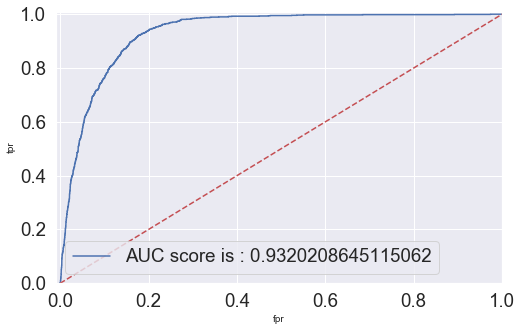

AUC Score for logistic regression is 0.9320208645115062


In [52]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test_logr[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

In [53]:
print ('AUC Score for logistic regression for test data is', roc_auc_score(y_test,yprob_test_logr[:,1]))

AUC Score for logistic regression for test data is 0.9320208645115062


### 5.2 Logistic Regression with Polynomial Features

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

logr_poly = LogisticRegression(max_iter=4000,random_state=0)

logr_poly.fit(X_train_poly,y_train.values.ravel())
ypred_train_logr_poly = logr_poly.predict(X_train_poly)
ypred_test_logr_poly = logr_poly.predict(X_test_poly)
yprob_test_logr_poly = logr_poly.predict_proba(X_test_poly)

# I had to increase "max_iter" from default value to 4000 in order to obtain convergence.

In [83]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr_poly), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr_poly), '\n')
print ('confusion_matrix for test data with threshold od 0.2 is : \n', confusion_matrix(y_test,yprob_test_logr_poly[:,1] > 0.2), '\n')

confusion matrix for training data is : 
 [[26694   751]
 [ 1424  2022]] 
 

confusion_matrix for test data is : 
 [[8765  338]
 [ 647  547]] 

confusion_matrix for test data with threshold od 0.2 is : 
 [[8240  863]
 [ 299  895]] 



In [84]:
print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

AUC Score for logistic regression is 0.9320208645115062


In [85]:
print ('AUC Score for logistic regression with polynomial features is', roc_auc_score(y_test,yprob_test_logr_poly[:,1]))

AUC Score for logistic regression with polynomial features is 0.9244446260008529


### 5.3 Decision Trees 

In [86]:
from sklearn import preprocessing
sca=preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier(max_depth = 5, random_state=15)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) # Predictions on training data for DecisionTreeClassifer()
ypred_test_dt = dt.predict(X_test) # Predictions on testing data for DecisionTreeClassifer()

print ('confusion matrix for training data for default threshold of 0.5  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshold of 0.5 is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

confusion matrix for training data for default threshold of 0.5  is : 
 [[26542   903]
 [ 1605  1841]] 
 

confusion_matrix for test data for default threshold of 0.5 is : 
 [[8795  308]
 [ 621  573]] 



**Scores on test data for decision Trees**

In [89]:
yprob_test_dt = dt.predict_proba(X_test) # probability predictions based on DecisionTree Classifier

print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_dt), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_dt), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_dt), '\n')
print ('AUC score for test data with DT is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))

Accuracy for test data is : 
 0.9097795474410022 

Recall for test data is : 
 0.4798994974874372 

Precision for test data is : 
 0.6503972758229285 

AUC score for test data with DT is : 
 0.9059131296748859


### 5.4 Random Forest 

In [90]:
from sklearn import preprocessing
sca=preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_estimators = 200, random_state=0)
rf.fit(X_train,y_train.values.ravel())

ypred_train_rf = rf.predict(X_train) # Predictions on training data for RandomForest
ypred_test_rf = rf.predict(X_test) # Predictions on test data for RandomForest

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')

confusion matrix for training data for default threshold is : 
 [[27445     0]
 [    0  3446]] 
 

confusion_matrix for test data for default threshold is : 
 [[8853  250]
 [ 708  486]] 



**Scores on test data for RandomForest**

In [93]:
yprob_test_rf = rf.predict_proba(X_test) # probability predictions based on RandomForest

print ('Scores for default threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_rf), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_rf), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_rf), '\n')
print ('AUC score for test data with RF is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

Scores for default threshold value of:  0.5 

Accuracy for test data is : 
 0.9069631931630572 

Recall for test data is : 
 0.40703517587939697 

Precision for test data is : 
 0.6603260869565217 

AUC score for test data with RF is : 
 0.9318141754213964


### 5.5 K-Nearest Neighbor

In [94]:
from sklearn.neighbors import KNeighborsClassifier 

In [95]:
# I tried "k" of 3 (AUC = .75), 100 (AUC =.88), and 200 (AUC =.89).
# k of 200 is approximately equal to the square root of the number of records, i.e., rule of thumb for maximum'k'. 
# Decided to use 100 as my final "k" hyperparameter; minimal difference in AUC going from 100 to 200.

knn = KNeighborsClassifier (n_neighbors=100, metric='euclidean')

In [96]:
knn.fit(X_train, y_train.values.ravel()) # Train model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [97]:
# Evaluate model performance

In [98]:
knn_predict = knn.predict(X_test)  

In [99]:
print(confusion_matrix(y_test, knn_predict))

[[8988  115]
 [ 968  226]]


In [100]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9103
           1       0.66      0.19      0.29      1194

    accuracy                           0.89     10297
   macro avg       0.78      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



In [101]:
yprob_test_knn = knn.predict_proba(X_test) # probability predictions based on KNN

In [102]:
print ('AUC score for test data with KNN is : \n', roc_auc_score(y_test,yprob_test_knn[:,1]))

AUC score for test data with KNN is : 
 0.8837208949283383


### 5.6 Gradient Boosting 

In [104]:
# Trying a sequential learner because of the imbalanced dataset.

from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Try different learning rates

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train.values.ravel())

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.904
Accuracy score (testing): 0.898
Learning rate:  0.075
Accuracy score (training): 0.906
Accuracy score (testing): 0.899
Learning rate:  0.1
Accuracy score (training): 0.908
Accuracy score (testing): 0.899
Learning rate:  0.25
Accuracy score (training): 0.914
Accuracy score (testing): 0.902
Learning rate:  0.5
Accuracy score (training): 0.917
Accuracy score (testing): 0.908
Learning rate:  0.75
Accuracy score (training): 0.919
Accuracy score (testing): 0.905
Learning rate:  1
Accuracy score (training): 0.918
Accuracy score (testing): 0.904


In [105]:
# Learning rate of .5 seems like best hyperparameter 
# Note I used "test" data for hyperparameter tuning; best practice is to use "validation" data for that.
# I set number of trees at 200; the same I used for Random Forest.

gb_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train.values.ravel())
predictions_train = gb_clf2.predict(X_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix - Training:")
print(confusion_matrix(y_train, predictions_train))
print("Classification Report - Training")
print(classification_report(y_train, predictions_train))
yprob_train_gb = gb_clf2.predict_proba(X_train)
print ('AUC score for training data with GB is : \n', roc_auc_score(y_train,yprob_train_gb[:,1]))
print ('')
print("Confusion Matrix - Test:")
print(confusion_matrix(y_test, predictions))
print("Classification Report - Test")
print(classification_report(y_test, predictions))
yprob_test_gb = gb_clf2.predict_proba(X_test)
print ('AUC score for test data with GB is : \n', roc_auc_score(y_test,yprob_test_gb[:,1]))

Confusion Matrix - Training:
[[26623   822]
 [ 1739  1707]]
Classification Report - Training
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     27445
           1       0.67      0.50      0.57      3446

    accuracy                           0.92     30891
   macro avg       0.81      0.73      0.76     30891
weighted avg       0.91      0.92      0.91     30891

AUC score for training data with GB is : 
 0.9446168176589553

Confusion Matrix - Test:
[[8805  298]
 [ 647  547]]
Classification Report - Test
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9103
           1       0.65      0.46      0.54      1194

    accuracy                           0.91     10297
   macro avg       0.79      0.71      0.74     10297
weighted avg       0.90      0.91      0.90     10297

AUC score for test data with GB is : 
 0.9316927289050622


## 5.7 Comparing AUC scores for "supervised" ML Models

In [109]:
auc_score = []
auc_score.append(roc_auc_score(y_test,yprob_test_logr[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_logr_poly[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_dt[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_rf[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_knn[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_gb[:,1]))
auc_scores = pd.Series(auc_score, index = ['Logistic Regression', 'Logistic Regression w/ Polynomial Features','Decision Tree', 'Random Forest','K-Nearest Neighbor','Gradient Boosting'])
auc_scores

Logistic Regression                           0.932021
Logistic Regression w/ Polynomial Features    0.924445
Decision Tree                                 0.905913
Random Forest                                 0.931814
K-Nearest Neighbor                            0.883721
Gradient Boosting                             0.931693
dtype: float64

In [110]:
# Logistic Regression, Random Forest and Gradient Boosting all appear to give good results.
# My preference is to use Gradient Boosting since it is more appropriate for an imbalanced data set. 
# May be able to tune hyperparameters of Gradient Boosting in order to get even better results.